# Airline Passenger Satisfaction

## Data Collection

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from tabulate import tabulate
import sklearn

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
train = pd.read_csv('data/train.csv', index_col=[0])
test = pd.read_csv('data/test.csv', index_col=[0])

df = pd.concat([train, test])

In [3]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     12988

In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype('float')

In [7]:
zeroRatingRows = df[(df['Inflight wifi service']==0)|
                     (df['Departure/Arrival time convenient']==0)|
                     (df['Ease of Online booking']==0)|
                     (df['Gate location']==0)|
                     (df['Food and drink']==0)|
                     (df['Online boarding']==0)|
                     (df['Seat comfort']==0)|
                     (df['Inflight entertainment']==0)|
                     (df['On-board service']==0)|
                     (df['Leg room service']==0)|
                     (df['Baggage handling']==0)|
                     (df['Checkin service']==0)|
                     (df['Inflight service']==0)|
                     (df['Cleanliness']==0)].index

df.drop(zeroRatingRows, inplace=True)

In [8]:
df.reset_index(inplace=True)
df.drop(['id', 'index'], axis=1, inplace=True)

## Exploratory Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115328 entries, 0 to 115327
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             115328 non-null  object 
 1   Customer Type                      115328 non-null  object 
 2   Age                                115328 non-null  int64  
 3   Type of Travel                     115328 non-null  object 
 4   Class                              115328 non-null  object 
 5   Flight Distance                    115328 non-null  int64  
 6   Inflight wifi service              115328 non-null  int64  
 7   Departure/Arrival time convenient  115328 non-null  int64  
 8   Ease of Online booking             115328 non-null  int64  
 9   Gate location                      115328 non-null  int64  
 10  Food and drink                     115328 non-null  int64  
 11  Online boarding                    1153

In [10]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000,115328.000000
mean,39.853141,1223.041542,2.818812,3.206437,2.878971,2.987262,3.212542,3.329859,3.456715,3.379899,3.386749,3.381867,3.638509,3.293493,3.647423,3.293606,14.828507,15.269735
std,15.029628,999.348306,1.253365,1.386996,1.298499,1.282303,1.324611,1.263588,1.312121,1.327398,1.285533,1.295034,1.167805,1.265975,1.165018,1.310101,38.078253,38.583433
min,7.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,28.000000,441.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,867.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1773.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Visualizations

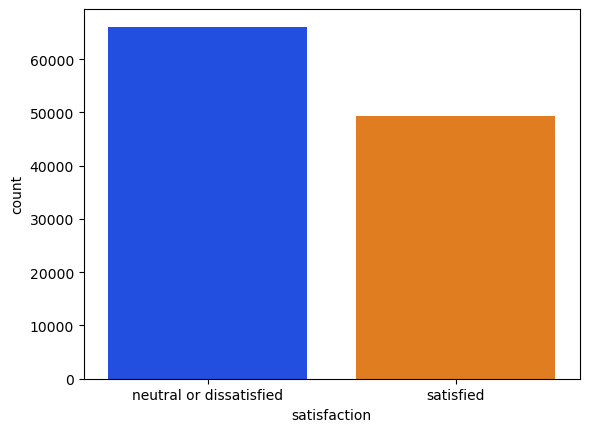

In [11]:
sns.countplot(data=df, x='satisfaction', palette='bright')
plt.show()

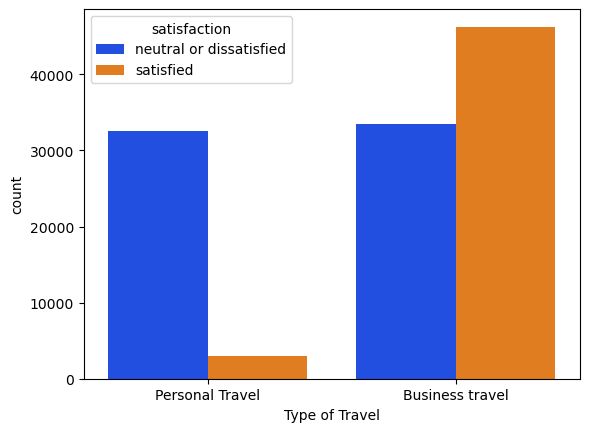

In [12]:
sns.countplot(data=df, x='Type of Travel', hue='satisfaction', palette='bright')
plt.show()

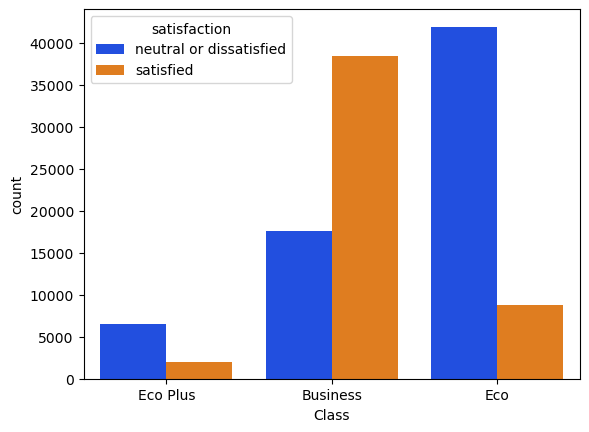

In [13]:
sns.countplot(data=df, x='Class', hue='satisfaction', palette='bright')
plt.show()

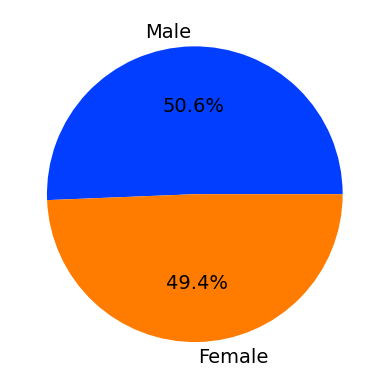

In [14]:
color_pal = sns.color_palette('bright')[0:2]
labels = list(df['Gender'].unique())

# plt.figure(figsize=(20, 8))
# plt.title('Distribution of Tweets by Sentiment', fontsize=20)
plt.pie(df['Gender'].value_counts(), labels=labels, colors=color_pal, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

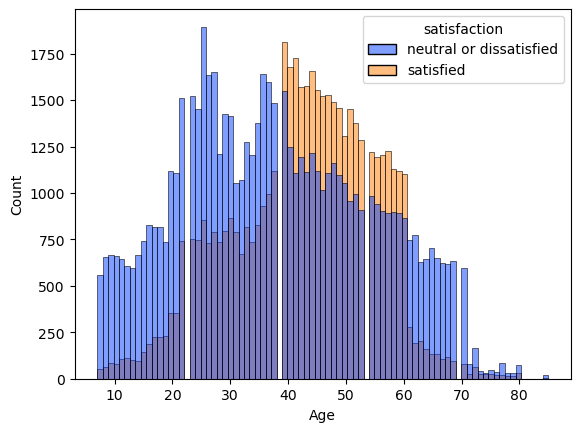

In [15]:
sns.histplot(data=df, x='Age', hue='satisfaction', palette='bright')
plt.show()

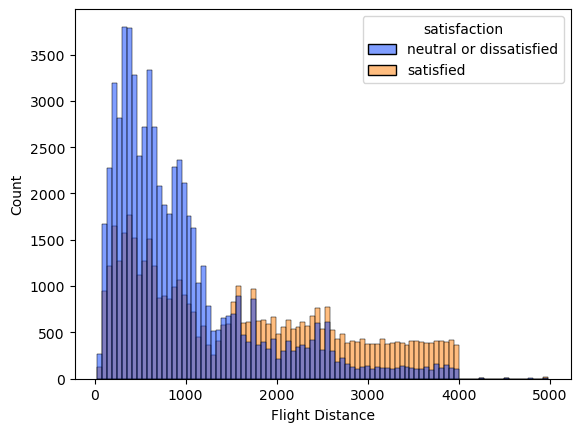

In [16]:
sns.histplot(data=df, x='Flight Distance', hue='satisfaction', palette='bright')
plt.show()

In [17]:
label_encoder = LabelEncoder()

df1 = df.copy()
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for c in categorical_cols:
    df1[c] = label_encoder.fit_transform(df1[c])

df1['satisfaction'] = df1['satisfaction'].replace('satisfied', 1)
df1['satisfaction'] = df1['satisfaction'].replace('neutral or dissatisfied', 0)

df1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25.0,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1.0,6.0,0
2,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,1
3,0,0,26,1,1,1180,3,4,2,1,...,1,3,4,4,4,4,1,0.0,0.0,0
4,1,0,47,1,1,1276,2,4,2,3,...,2,3,3,4,3,5,2,9.0,23.0,0


<Axes: >

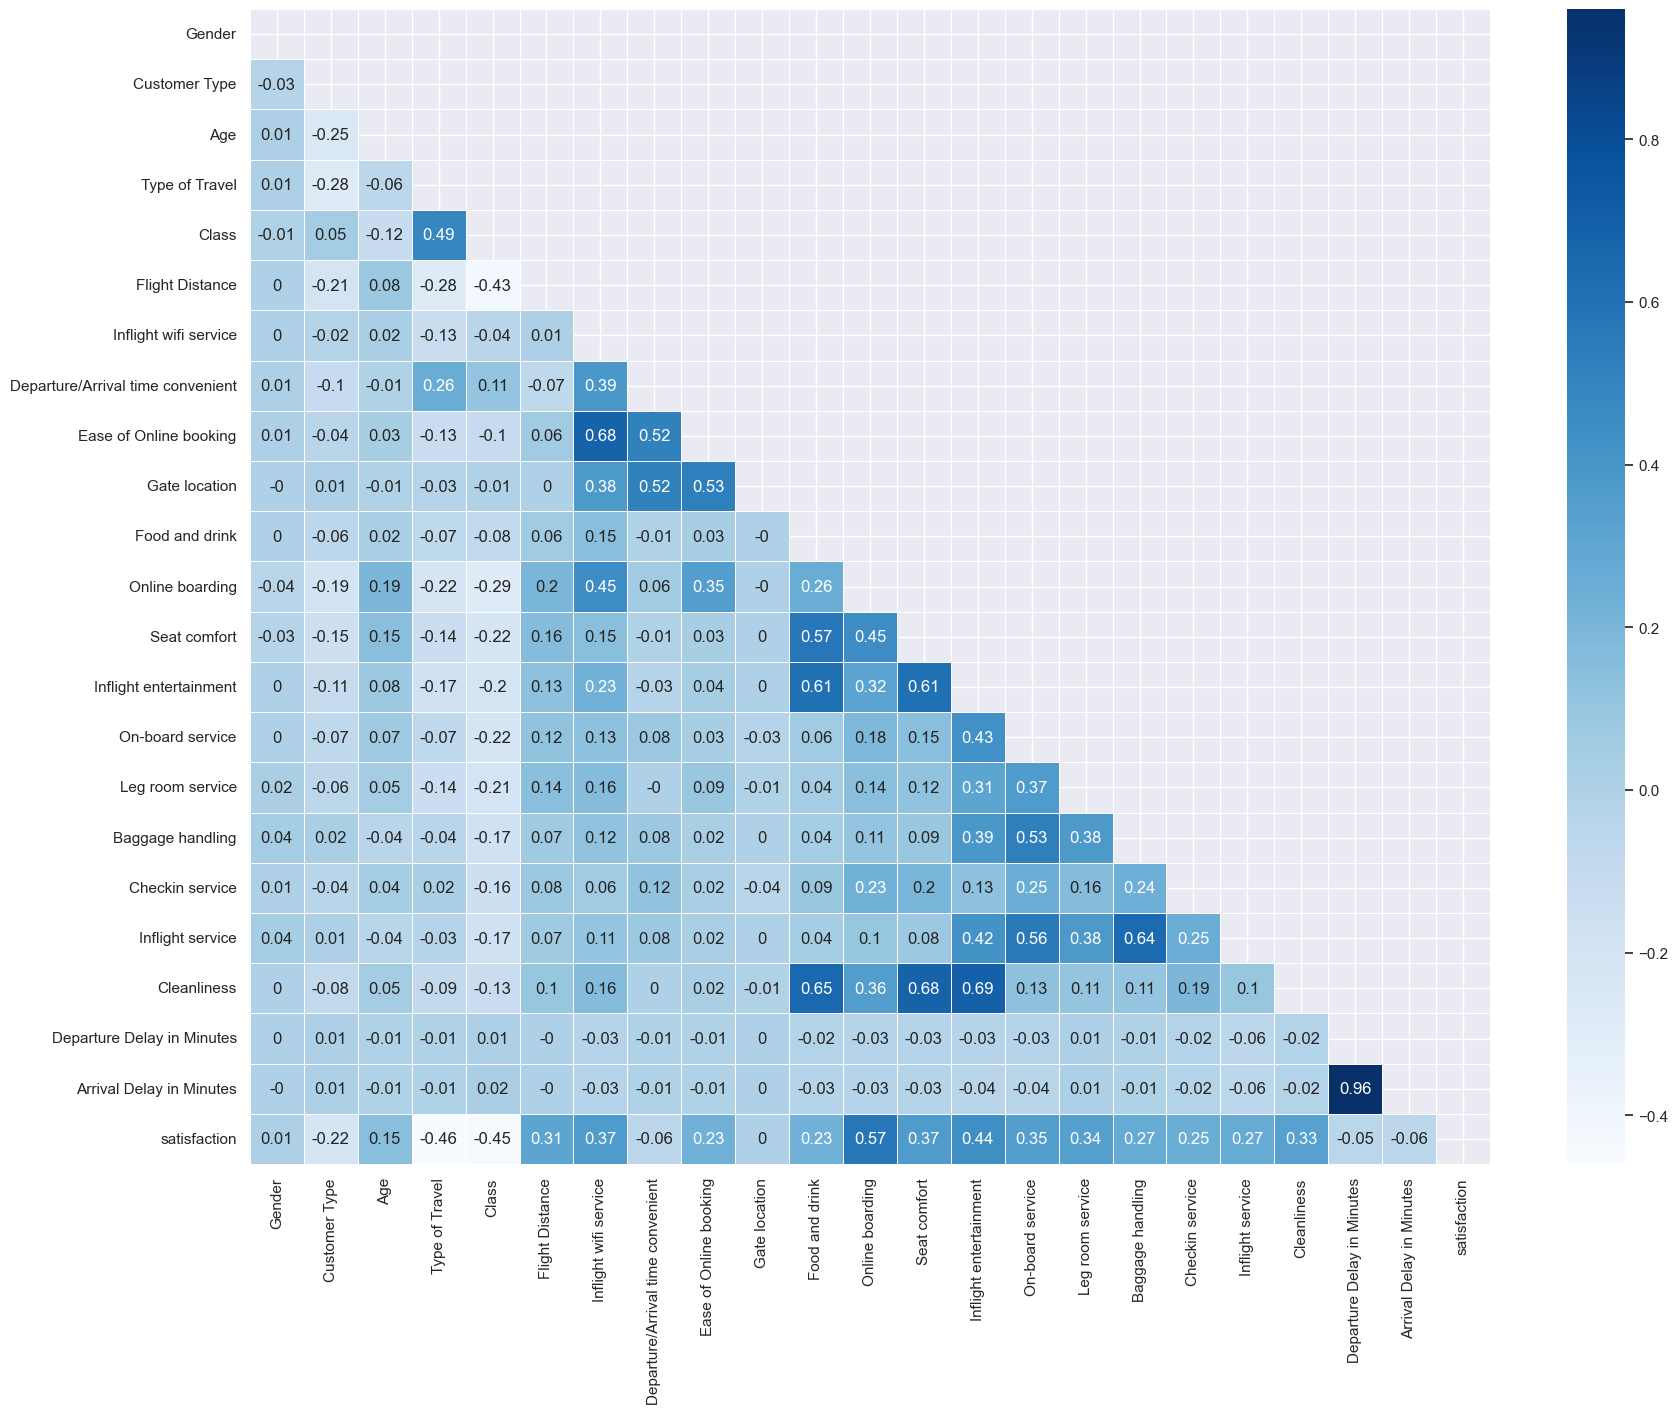

In [18]:
corr_matrix = df1.corr().round(2)

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1)
plt.figure(figsize = (20,15))
sns.heatmap(corr_matrix, annot = True, cmap='Blues', linewidths=0.5, mask=mask)

## Data Preparation

In [19]:
df2 = df.copy()

df2['satisfaction'] = df2['satisfaction'].replace('satisfied', 1)
df2['satisfaction'] = df2['satisfaction'].replace('neutral or dissatisfied', 0)

In [20]:
one_hot_cols = ['Gender', 'Customer Type', 'Type of Travel']
ordinal_cols = ['Class']
standard_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
min_max_cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
               'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
               'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

In [21]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

onehot = ColumnTransformer([('onehot', OneHotEncoder(), one_hot_cols)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_train[ordinal_cols] = oe.fit_transform(X_train[ordinal_cols])
X_train[standard_cols] = std_scaler.fit_transform(X_train[standard_cols])
X_train[min_max_cols] = min_max_scaler.fit_transform(X_train[min_max_cols])
X_train = onehot.fit_transform(X_train)

X_test[ordinal_cols] = oe.transform(X_test[ordinal_cols])
X_test[standard_cols] = std_scaler.transform(X_test[standard_cols])
X_test[min_max_cols] = min_max_scaler.transform(X_test[min_max_cols])
X_test = onehot.transform(X_test)

## Training Models

In [22]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score: ", roc)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     13266
           1       0.86      0.84      0.85      9800

    accuracy                           0.88     23066
   macro avg       0.87      0.87      0.87     23066
weighted avg       0.88      0.88      0.88     23066

ROC AUC Score:  0.8716911269256685


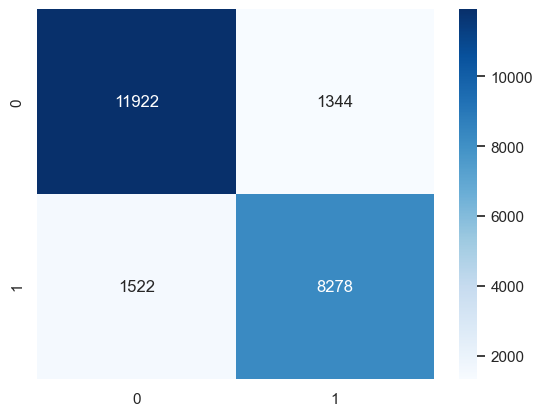

In [34]:
evaluate_model(GaussianNB(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     13266
           1       0.94      0.89      0.91      9800

    accuracy                           0.93     23066
   macro avg       0.93      0.92      0.92     23066
weighted avg       0.93      0.93      0.93     23066

ROC AUC Score:  0.9214687924016282


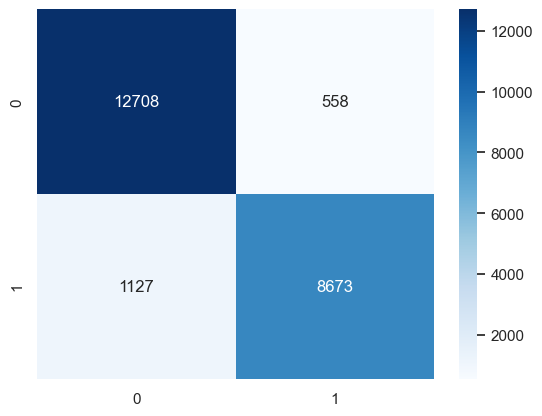

In [26]:
evaluate_model(KNeighborsClassifier(n_neighbors=5), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     13266
           1       0.93      0.94      0.94      9800

    accuracy                           0.95     23066
   macro avg       0.94      0.95      0.95     23066
weighted avg       0.95      0.95      0.95     23066

ROC AUC Score:  0.9455366719279299


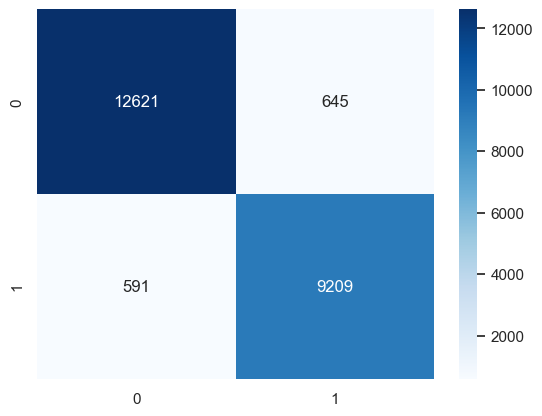

In [27]:
evaluate_model(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     13266
           1       0.97      0.94      0.96      9800

    accuracy                           0.96     23066
   macro avg       0.97      0.96      0.96     23066
weighted avg       0.96      0.96      0.96     23066

ROC AUC Score:  0.9607658676315393


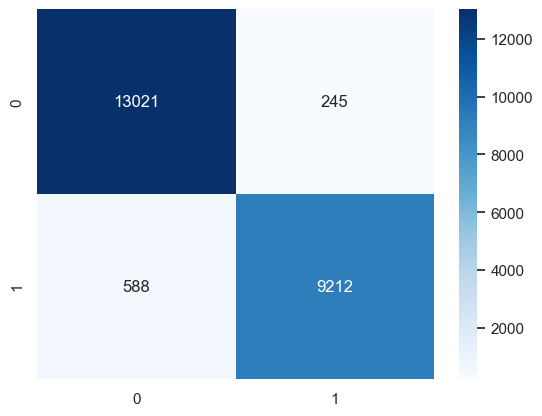

In [28]:
evaluate_model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     13266
           1       0.88      0.88      0.88      9800

    accuracy                           0.90     23066
   macro avg       0.90      0.90      0.90     23066
weighted avg       0.90      0.90      0.90     23066

ROC AUC Score:  0.8958581858795077


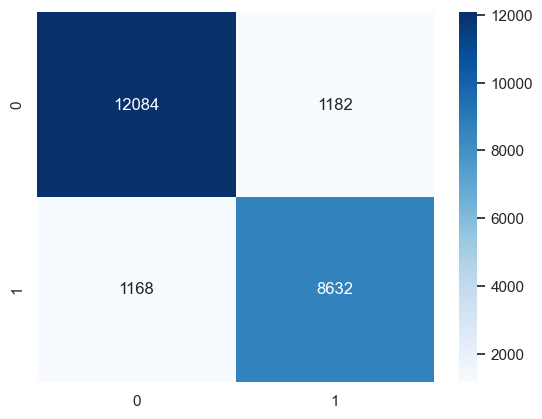

In [29]:
evaluate_model(LogisticRegression(random_state=42, solver='liblinear'), X_train, X_test, y_train, y_test)

### Cross Validation

In [37]:
clf_models = {
    'GaussianNB' : GaussianNB(),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'DecisionTree' : DecisionTreeClassifier(),
    'RandomForest' : RandomForestClassifier(),
    'LogisticRegression' : LogisticRegression(random_state=42, solver='liblinear'),
}

In [38]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

onehot = ColumnTransformer([('onehot', OneHotEncoder(), one_hot_cols)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X[ordinal_cols] = oe.fit_transform(X[ordinal_cols])
X[standard_cols] = std_scaler.fit_transform(X[standard_cols])
X[min_max_cols] = min_max_scaler.fit_transform(X[min_max_cols])
X = onehot.fit_transform(X)

print("KFold Cross-Validation Mean Accuracies")
for name, model in clf_models.items():
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=10, n_jobs=-1) 
    print(f"{name} Mean Accuracy: {np.mean(scores)}")

KFold Cross-Validation Mean Accuracies
GaussianNB Mean Accuracy: 0.8776879637700729
KNN Mean Accuracy: 0.9281007268981176
DecisionTree Mean Accuracy: 0.9464224205562051
RandomForest Mean Accuracy: 0.963668852164079
LogisticRegression Mean Accuracy: 0.8983594679027943


### Grid Search Hyperparameter Tuning

In [44]:
clf_models = {
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'DecisionTree' : DecisionTreeClassifier(),
    'RandomForest' : RandomForestClassifier(),
    'LogisticRegression' : LogisticRegression(random_state=42, solver='liblinear'),
}

parameters_dict = {
    'KNN' : [{
        'n_neighbors': [3, 4, 5, 6, 7],
    }],
    'DecisionTree' : [{
        'criterion': ["gini", "entropy", "log_loss"],
        'splitter': ["best", "random"], 
        'max_depth': list(range(1,51)), 
        'max_features':[None, "sqrt", "log2"], 
        'min_samples_leaf': list(range(1, 11))
    }],
    'RandomForest' : [{
        'n_estimators': list(range(1, 51)),
        'criterion': ["gini", "entropy", "log_loss"],
        'max_depth': list(range(1,51)),
        'max_features':[None, "sqrt", "log2"],
        'min_samples_leaf': list(range(1, 11))
    }],
    'LogisticRegression' : [{
        'C': [0.001, 0.01, 0.1, 1, 10],
    }]
}

In [ ]:
for model_name, model in clf_models.items():
    model_parameters = parameters_dict[model_name]
    grid = GridSearchCV(model, model_parameters, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)

    print(f"{model_name} Classifier Grid Search:")
    print(f"Best cross-validation score: {grid.best_score_}")
    print(f"Best parameters: {grid.best_params_}")
    print(f"Test score: {grid.score(X_test, y_test)}")
    print()